In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import matplotlib for plotting
import matplotlib.pyplot as plt

In [2]:
#read in the results csv file
results_df = pd.read_csv("results.csv")

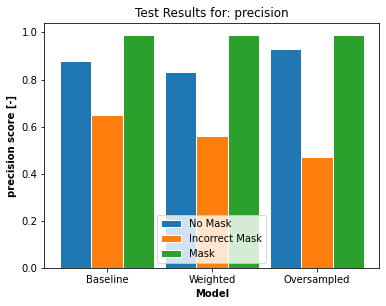

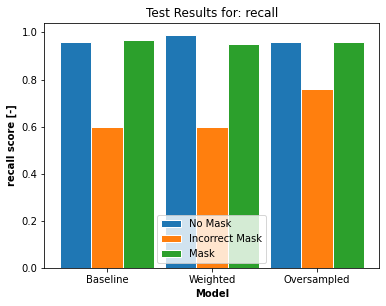

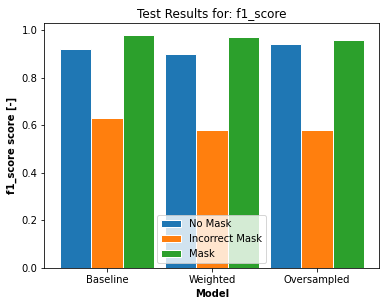

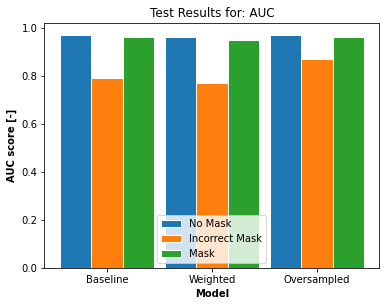

In [3]:
#lopp through each metric to produce a bar chart per metric
for i in results_df["metric"].unique():
    #filter the active dataframe down to the metric of interest
    active_df=results_df[results_df["metric"]==i]
    
    #create a list of scores for "no mask" class
    no_mask = active_df[active_df["class"]=="no_mask"]["score"].tolist()

    #create a list of scores for "incorrect mask" class
    incorrect_mask = active_df[active_df["class"]=="incorrect_mask"]["score"].tolist()

    #create a list of scores for "mask" class
    mask = active_df[active_df["class"]=="mask"]["score"].tolist()
    
    #metrics for calulating bar sizing and spacing
    width = 0.3
    x1 = np.arange(len(no_mask))
    x2 = [x + width for x in x1]
    x3 = [x + width for x in x2]
    
    #create the plot a suitable size for IEEE template
    plt.figure(figsize=(6,4.5))

    #plot "no mask" bars
    plt.bar(x1,no_mask,
            label="No Mask",
            width=width,
            edgecolor="white")

    #plot "incorrect mask" bars
    plt.bar(x2,
            incorrect_mask,
            label="Incorrect Mask",
            width=width,
            edgecolor="white")

    #plot "mask" bars
    plt.bar(x3,
            mask,label="Mask",
            width=width,
            edgecolor="white")

    #set labels, ticks, legend and title
    plt.xlabel("Model",fontweight="bold")
    plt.xticks([r + width for r in range(len(no_mask))],["Baseline","Weighted","Oversampled"])
    plt.ylabel(f"{i} score [-]",fontweight="bold")
    plt.legend(loc=8)
    plt.title(f"Test Results for: {i}")